<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

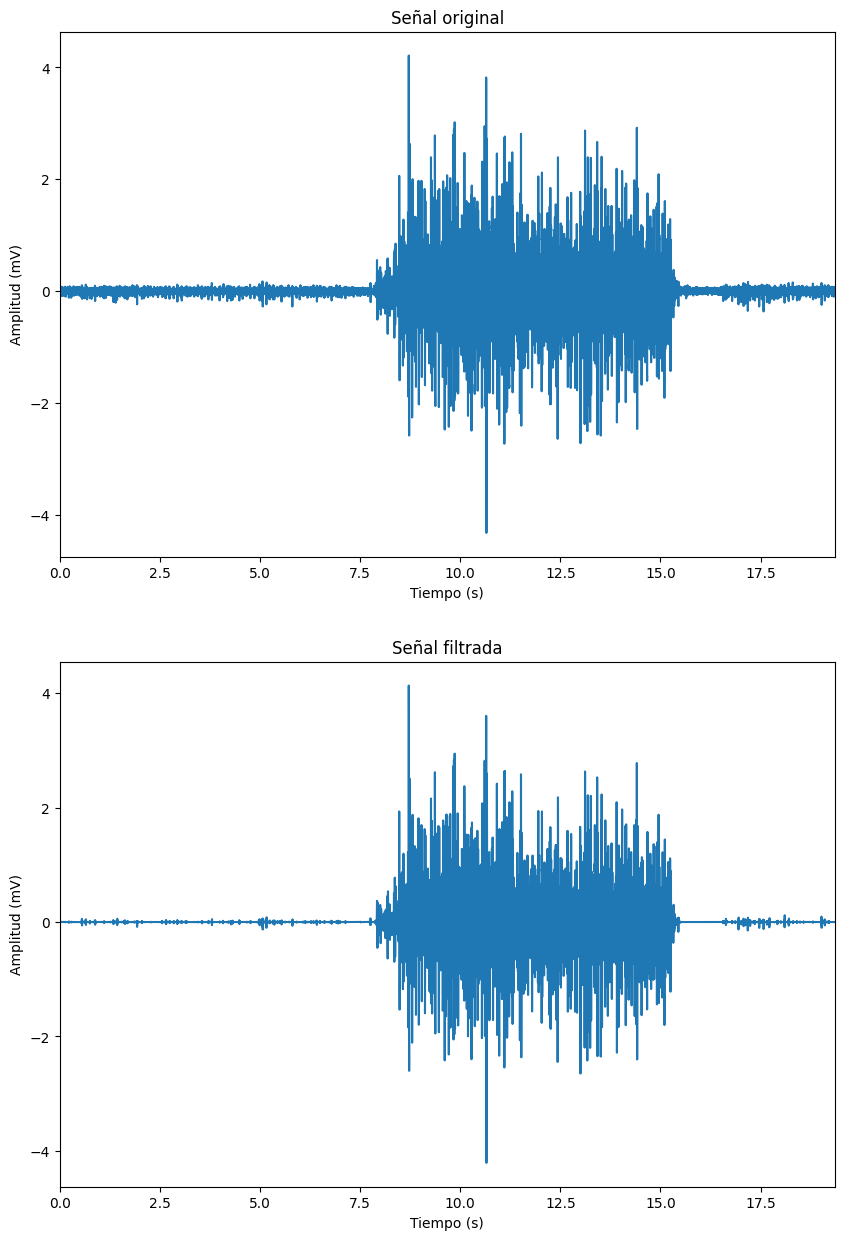

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks

# Cargar el archivo de texto,
a_r = np.genfromtxt("adrian_ConOposición.txt", delimiter="\t",skip_header = 3)

frecuencia_muestreo = 1000  # Hz
Ts = 1/frecuencia_muestreo

bits = 10 # Bits de la salida
volt_range = 10 #Rango de voltaje en milivoltios (0; 10) mV

# Extraer la penultima columna (datos)
data = (a_r[:,-2]*volt_range/(2**bits - 1)) # convertir los bits a mV
data = data - np.mean(data) # Centrar la señal para que vaya de -5 a 5 mV
tiempo = np.arange(0, len(data)*Ts, Ts) # Crear vector de tiempo considerando periodo de muestreo

# Aplicar la transformada wavelet
coeffs = pywt.wavedec(data, 'db6', level=4)

# Filtrar los coeficientes
threshold = 0.109
filtered_coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(filtered_coeffs, 'db6')
#filtered_signal = filtered_signal[0:len(filtered_signal)-1]

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
plt.plot(tiempo, data)
plt.title('Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.xlim(tiempo[0], tiempo[-1])

plt.subplot(2, 1, 2)
plt.plot(tiempo,filtered_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.xlim(tiempo[0], tiempo[-1])

plt.tight_layout